In [11]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgfile = 'Lenna.png' # 512x512x3
X = mpimg.imread(imgfile) #array

U是左奇異向量矩陣，其中每個列向量都是正交向量。在圖像壓縮中，它代表原圖像在維度空間中的投影。
<p>
E是奇異值向量，它是一個按遞減順序排序的向量。它表示在U中保留哪些列向量以及在VT中保留哪些行向量。在圖像壓縮中，它代表每個維度的重要性程度，越高的奇異值表示越重要的維度。
<p>
VT是右奇異向量矩陣，其中每個行向量也是正交向量。在圖像壓縮中，它代表將圖像的投影轉換回原始維度空間的方法。

141
70
35


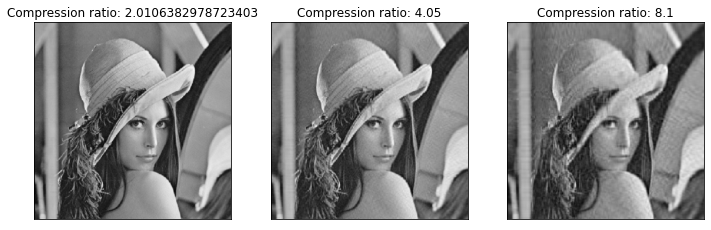

In [16]:
if len(X.shape) > 2:
    X = np.mean(X, axis=2) # convert RGB to grayscale
N, p = X.shape #(512,512)
U, E, VT = svd(X, full_matrices = False) #進行奇異值分解的降維壓縮
q = np.array([p/4, p/8, p/16]).astype('int') #三個不同壓縮比率: 128,64,32
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, r in enumerate(q):
    Xq = U[:, :r] @ np.diag(E[:r]) @ VT[:r, :]
    ax[i].imshow(Xq, cmap = 'gray')
    ax[i].set_title('Compression ratio: {}'.format(p/r/2))
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

<h3> HW: 將圖片用SVD分解,移除不必要的資訊後,再將剩下來的重新組回來</h3>

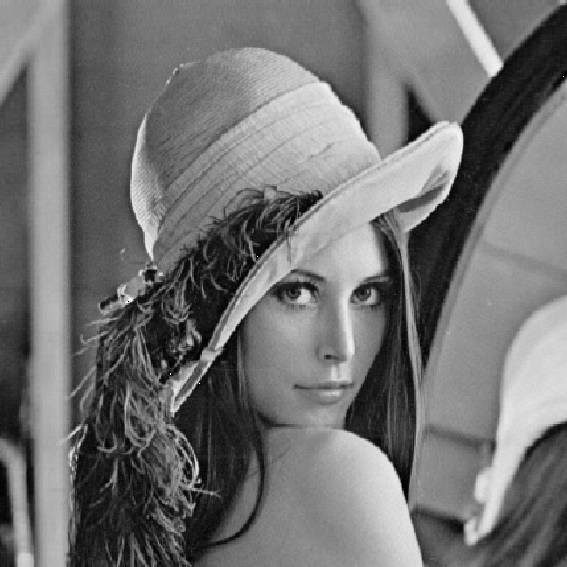

In [3]:
from PIL import Image
img = Image.open('Lenna.png').convert('L')
img_arr = np.array(img)
U, E, VT = np.linalg.svd(img_arr)
# 选择要保留的奇异值数量
k = 150
Ek = np.diag(E[:k])

# 根据保留的奇异值数量选择U和Vt的列和行
Uk = U[:, :k]
Vtk = VT[:k, :]

# 计算重构的图像
img_reconstructed = np.dot(np.dot(Uk, Ek), Vtk)

# 将重构的图像转换回PIL图像对象
img_reconstructed = Image.fromarray(np.uint8(img_reconstructed))

img_reconstructed